In [199]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest, chi2_contingency, ttest_ind


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Fase 1: Exploración y Limpieza

### Primer Dataframe: Customer Flight Activity

In [116]:
#Abrimos el primer csv y vemos las primeras 5 columnas
df_flight = pd.read_csv("Customer Flight Activity.csv")
df_flight.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [117]:
# vemos que los nombres de las columnas tienen mayúsculas. Pasaremos todo a minúsculas
nuevas_columnas = {columna: columna.lower() for columna in df_flight.columns}

# comprobamos que hemos cambiado las mayúsculas correctamente
nuevas_columnas

{'Loyalty Number': 'loyalty number',
 'Year': 'year',
 'Month': 'month',
 'Flights Booked': 'flights booked',
 'Flights with Companions': 'flights with companions',
 'Total Flights': 'total flights',
 'Distance': 'distance',
 'Points Accumulated': 'points accumulated',
 'Points Redeemed': 'points redeemed',
 'Dollar Cost Points Redeemed': 'dollar cost points redeemed'}

In [118]:
# aplicamos el método rename para actualizar los nombres de las columnas
df_flight.rename(columns = nuevas_columnas, inplace = True)

# comprobamos que se han cambiado correctamente
df_flight.head()

,loyalty number,year,month,flights booked,flights with companions,total flights,distance,points accumulated,points redeemed,dollar cost points redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [119]:
# Reemplazamos los espacios en los nombres de las columnas por '_' para evitar errores:
reepl_columnas = {columna: columna.replace(" ", "_") for columna in df_flight.columns}

# comprobamos que hemos creado el diccionario correctamente
reepl_columnas

{'loyalty number': 'loyalty_number',
 'year': 'year',
 'month': 'month',
 'flights booked': 'flights_booked',
 'flights with companions': 'flights_with_companions',
 'total flights': 'total_flights',
 'distance': 'distance',
 'points accumulated': 'points_accumulated',
 'points redeemed': 'points_redeemed',
 'dollar cost points redeemed': 'dollar_cost_points_redeemed'}

In [120]:
# aplicamos nuevamente el método rename para actualizar los nombres de las columnas
df_flight.rename(columns = reepl_columnas, inplace = True)

# comprobamos que se han cambiado correctamente
df_flight.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [121]:
# función exploración inicial del conjunto de datos:
def exploracion_dataframe(dataframe): 
    print(f'Este DataFrame tiene la siguiente forma: {dataframe.shape}' )
    print("\n ..................... \n")
    print(f"Los duplicados que tenemos en el conjunto de datos son: {dataframe.duplicated().sum()}")
    print("\n ..................... \n")
    
    
    # generamos un DataFrame para los valores nulos
    print("Los nulos que tenemos en el conjunto de datos son:")
    df_nulos = pd.DataFrame(dataframe.isnull().sum() / dataframe.shape[0] * 100, columns = ["%_nulos"])
    if (df_nulos["%_nulos"] > 0).any():
        display(df_nulos)
    else:
        print('No hay columnas con nulos')
    
    print("\n ..................... \n")
    print(f"Los tipos de las columnas son:")
    display(pd.DataFrame(dataframe.dtypes, columns = ["tipo_dato"]))
    
    
    print("\n ..................... \n")
    dataframe_categoricas = dataframe.select_dtypes(include = "O")
        # Comprobamos si hay columnas categóricas
    if not dataframe_categoricas.empty:
        print('Valores de las columnas Categóricas'.upper())
        for col in dataframe_categoricas.columns:
            print(f"La columna {col.upper()} tiene las siguientes valore únicos:")
            display(pd.DataFrame(dataframe[col].value_counts()).head())
        #  los principales estadísticos de las columnas categorías   
        print("\n ..................... \n")
        print(f"Los principales estadísticos de las columnas categóricas son: ")
        display(dataframe.describe(include = "O").T)
    else:
        print('No hay columnas categóricas')
#  los principales estadísticos de las variables numéricas       
    print("\n ..................... \n")
    print(f"Los principales estadísticos de las columnas numéricas son: ")
    display(dataframe.describe().T)

In [122]:
exploracion_dataframe(df_flight)

Este DataFrame tiene la siguiente forma: (405624, 10)

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 1864

 ..................... 

Los nulos que tenemos en el conjunto de datos son:
No hay columnas con nulos

 ..................... 

Los tipos de las columnas son:


,tipo_dato
loyalty_number,int64
year,int64
month,int64
flights_booked,int64
flights_with_companions,int64
total_flights,int64
distance,int64
points_accumulated,float64
points_redeemed,int64
dollar_cost_points_redeemed,int64



 ..................... 

No hay columnas categóricas

 ..................... 

Los principales estadísticos de las columnas numéricas son: 


,count,mean,std,min,25%,50%,75%,max
loyalty_number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
flights_booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
flights_with_companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
total_flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
points_accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
points_redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
dollar_cost_points_redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [123]:
# Vemos que Month está en números, lo pasaremos a texto
#Creamos  un diccionario de mapeo de números de meses a nombres
month_mapping = {
    1: 'enero', 2: 'febrero', 3: 'marzo', 4: 'abril', 5: 'mayo', 6: 'junio',
    7: 'julio', 8: 'agosto', 9: 'septiembre', 10: 'octubre', 11: 'noviembre', 12: 'diciembre'
}

#Reemplazamos los valores
df_flight['month'] = df_flight['month'].replace(month_mapping)

# Verificar los cambios
df_flight['month'].unique()

array(['enero', 'septiembre', 'febrero', 'marzo', 'noviembre', 'abril',
       'mayo', 'julio', 'junio', 'agosto', 'octubre', 'diciembre'],
      dtype=object)

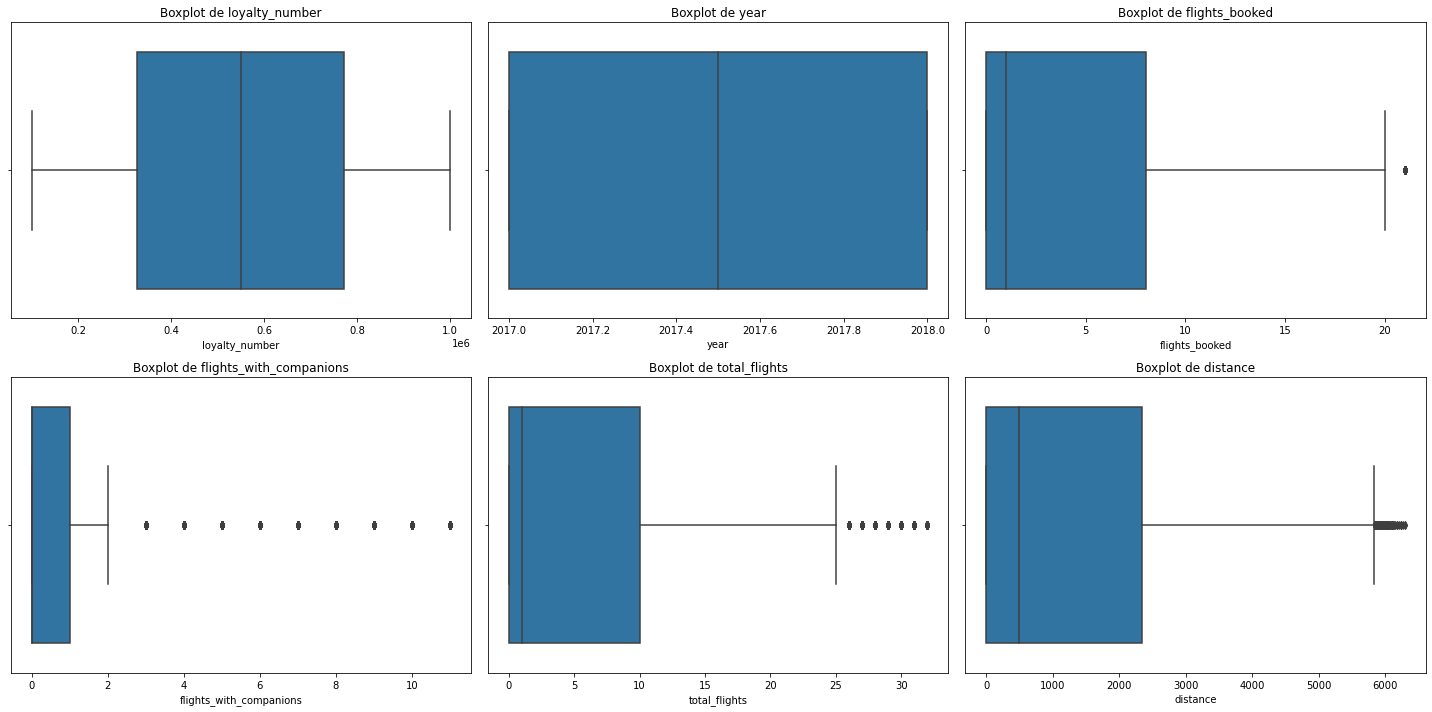

In [124]:
# Crear gráficos de caja para las columnas numéricas y revisar valores atípicos
# Filtramos solo las columnas numéricas
numeric_columns = df_flight.select_dtypes(include='number').columns

# Creamos la figura y los ejes para los gráficos
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10)) 
axes = axes.flat

# Generamos los boxplots para cada columna numérica
for indice, col in enumerate(numeric_columns):
    if indice < len(axes):  # Asegurarse de no exceder el número de ejes disponibles
        sns.boxplot(x=df_flight[col], ax=axes[indice])
        axes[indice].set_title(f'Boxplot de {col}')

# Eliminamos cualquier eje sobrante si hay menos columnas que ejes
for ax in axes[len(df_flight):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

Podemos ver que las últimas 3 columnas tienen valores atípicos. Sin embargo, ya que no necesitamos reemplazar valores nulos, los dejaremos como están.
Además, encontramos duplicados, por lo que profundizamremos sobre esto más adelante.

### Segundo Dataframe: Customer Loyalty History

In [125]:
#Abrimos el segundo csv y vemos las primeras 5 columnas
df_loyalty = pd.read_csv("Customer Loyalty History.csv")
df_loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [126]:
# vemos que los nombres de las columnas tienen mayúsculas. Pasaremos todo a minúsculas
nuevas_columnas_loyalty = {columna: columna.lower() for columna in df_loyalty.columns}

# comprobamos que hemos cambiado las mayúsculas correctamente
nuevas_columnas_loyalty

{'Loyalty Number': 'loyalty number',
 'Country': 'country',
 'Province': 'province',
 'City': 'city',
 'Postal Code': 'postal code',
 'Gender': 'gender',
 'Education': 'education',
 'Salary': 'salary',
 'Marital Status': 'marital status',
 'Loyalty Card': 'loyalty card',
 'CLV': 'clv',
 'Enrollment Type': 'enrollment type',
 'Enrollment Year': 'enrollment year',
 'Enrollment Month': 'enrollment month',
 'Cancellation Year': 'cancellation year',
 'Cancellation Month': 'cancellation month'}

In [127]:
# aplicamos el método rename para actualizar los nombres de las columnas
df_loyalty.rename(columns = nuevas_columnas_loyalty, inplace = True)

# comprobamos que se han cambiado correctamente
df_loyalty.head()

,loyalty number,country,province,city,postal code,gender,education,salary,marital status,loyalty card,clv,enrollment type,enrollment year,enrollment month,cancellation year,cancellation month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [128]:
# Reemplazamos los espacios en los nombres de las columnas por '_' para evitar errores:
reepl_columnas_loyalty = {columna: columna.replace(" ", "_") for columna in df_loyalty.columns}

# comprobamos que hemos creado el diccionario correctamente
reepl_columnas_loyalty

{'loyalty number': 'loyalty_number',
 'country': 'country',
 'province': 'province',
 'city': 'city',
 'postal code': 'postal_code',
 'gender': 'gender',
 'education': 'education',
 'salary': 'salary',
 'marital status': 'marital_status',
 'loyalty card': 'loyalty_card',
 'clv': 'clv',
 'enrollment type': 'enrollment_type',
 'enrollment year': 'enrollment_year',
 'enrollment month': 'enrollment_month',
 'cancellation year': 'cancellation_year',
 'cancellation month': 'cancellation_month'}

In [129]:
# aplicamos nuevamente el método rename para actualizar los nombres de las columnas
df_loyalty.rename(columns = reepl_columnas_loyalty, inplace = True)

# comprobamos que se han cambiado correctamente
df_loyalty.head()

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [130]:
#Exploramos el DF
exploracion_dataframe(df_loyalty)

Este DataFrame tiene la siguiente forma: (16737, 16)

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
loyalty_number,0.000000
country,0.000000
province,0.000000
city,0.000000
postal_code,0.000000
gender,0.000000
education,0.000000
salary,25.321145
marital_status,0.000000
loyalty_card,0.000000



 ..................... 

Los tipos de las columnas son:


,tipo_dato
loyalty_number,int64
country,object
province,object
city,object
postal_code,object
gender,object
education,object
salary,float64
marital_status,object
loyalty_card,object



 ..................... 

VALORES DE LAS COLUMNAS CATEGÓRICAS
La columna COUNTRY tiene las siguientes valore únicos:


,country
Canada,16737


La columna PROVINCE tiene las siguientes valore únicos:


,province
Ontario,5404
British Columbia,4409
Quebec,3300
Alberta,969
Manitoba,658


La columna CITY tiene las siguientes valore únicos:


,city
Toronto,3351
Vancouver,2582
Montreal,2059
Winnipeg,658
Whistler,582


La columna POSTAL_CODE tiene las siguientes valore únicos:


,postal_code
V6E 3D9,911
V5R 1W3,684
V6T 1Y8,582
V6E 3Z3,544
M2M 7K8,534


La columna GENDER tiene las siguientes valore únicos:


,gender
Female,8410
Male,8327


La columna EDUCATION tiene las siguientes valore únicos:


,education
Bachelor,10475
College,4238
High School or Below,782
Doctor,734
Master,508


La columna MARITAL_STATUS tiene las siguientes valore únicos:


,marital_status
Married,9735
Single,4484
Divorced,2518


La columna LOYALTY_CARD tiene las siguientes valore únicos:


,loyalty_card
Star,7637
Nova,5671
Aurora,3429


La columna ENROLLMENT_TYPE tiene las siguientes valore únicos:


,enrollment_type
Standard,15766
2018 Promotion,971



 ..................... 

Los principales estadísticos de las columnas categóricas son: 


,count,unique,top,freq
country,16737,1,Canada,16737
province,16737,11,Ontario,5404
city,16737,29,Toronto,3351
postal_code,16737,55,V6E 3D9,911
gender,16737,2,Female,8410
education,16737,5,Bachelor,10475
marital_status,16737,3,Married,9735
loyalty_card,16737,3,Star,7637
enrollment_type,16737,2,Standard,15766



 ..................... 

Los principales estadísticos de las columnas numéricas son: 


,count,mean,std,min,25%,50%,75%,max
loyalty_number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
clv,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
enrollment_year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
enrollment_month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
cancellation_year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
cancellation_month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


Vemos que las columnas salary, cancellation_year y cancellation_month contienen nulos, asique profundizamos un poco más. Además, vemos que salary tiene un número negativo que también reemplazaremos.

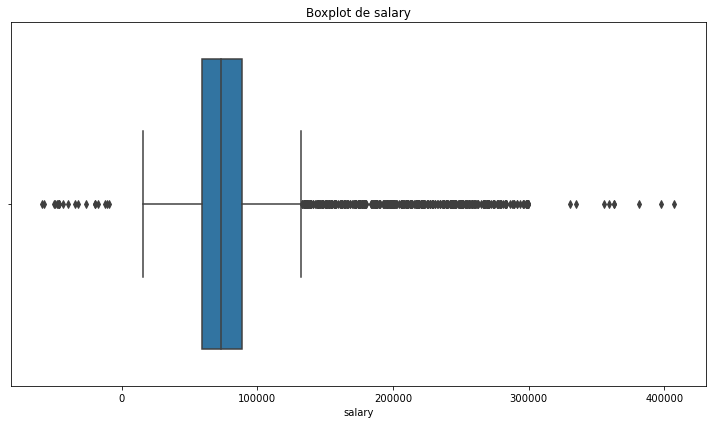

In [131]:
# primero miramos Salary
columna_num = 'salary' 

# Crear la figura y el eje para el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Generar el boxplot para la columna específica
sns.boxplot(x=df_loyalty[columna_num], ax=ax)
ax.set_title(f'Boxplot de {columna_num}')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [132]:
# Crear una máscara booleana que sea True donde haya valores negativos en la columna específica
negativos_salary = df_loyalty['salary'] < 0

# Mostrar los valores negativos en la columna específica
print(f"Valores negativos en la columna Salary son: {len(df_loyalty[negativos_salary])}")
df_loyalty[negativos_salary]

Valores negativos en la columna Salary son: 20


,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
1082,542976,Canada,Quebec,Montreal,H2Y 4R4,Male,High School or Below,-49830.0,Divorced,Star,24127.50,2018 Promotion,2018,3,NaN,NaN
1894,959977,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,-12497.0,Married,Aurora,9453.00,2018 Promotion,2018,3,NaN,NaN
2471,232755,Canada,British Columbia,Vancouver,V1E 4R6,Female,Bachelor,-46683.0,Single,Nova,4787.81,2018 Promotion,2018,3,NaN,NaN
3575,525245,Canada,British Columbia,Victoria,V10 6T5,Male,Bachelor,-45962.0,Married,Star,2402.33,2018 Promotion,2018,3,NaN,NaN
3932,603070,Canada,British Columbia,West Vancouver,V6V 8Z3,Female,Bachelor,-19325.0,Single,Star,2893.74,2018 Promotion,2018,3,NaN,NaN
4712,491242,Canada,British Columbia,Dawson Creek,U5I 4F1,Male,Bachelor,-43234.0,Married,Star,7597.91,2018 Promotion,2018,3,NaN,NaN
6560,115505,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-10605.0,Married,Nova,5860.17,2018 Promotion,2018,4,NaN,NaN
6570,430398,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-17534.0,Married,Nova,49423.80,2018 Promotion,2018,3,NaN,NaN
7373,152016,Canada,Ontario,Toronto,P1J 8T7,Female,Bachelor,-58486.0,Married,Aurora,5067.21,2018 Promotion,2018,2,NaN,NaN
8576,194065,Canada,Ontario,Sudbury,M5V 1G5,Female,Bachelor,-31911.0,Married,Nova,2888.85,2018 Promotion,2018,2,NaN,NaN


In [133]:
#No tenemos mucha información sobre qué significan los números negativos en el salario. Por ahora los cambiamos a números positivos asumiendo que es un error de tipeo
df_loyalty['salary'] = df_loyalty['salary'].abs()
# Comprobamos que se hayan cambiado:
negativos_salary_comprobar = df_loyalty['salary'] < 0
print(f"Valores negativos en la columna Salary son: {len(df_loyalty[negativos_salary_comprobar])}")


Valores negativos en la columna Salary son: 0


# Unión de los conjuntos de datos

In [134]:
#revisamos nuevamente las columnas de ambos DF
print(f'Las columnas de Customer Flight Activity son: {df_flight.columns}')
print("\n ..................... \n")
print(f'Las columnas de Customer Loyalty History son: {df_loyalty.columns}')    

Las columnas de Customer Flight Activity son: Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed'],
      dtype='object')

 ..................... 

Las columnas de Customer Loyalty History son: Index(['loyalty_number', 'country', 'province', 'city', 'postal_code',
       'gender', 'education', 'salary', 'marital_status', 'loyalty_card',
       'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month',
       'cancellation_year', 'cancellation_month'],
      dtype='object')


In [135]:
#Realizamos un Merge, uniendo los csv a partir de la columna 'loyalty_number'
df_conjunto = df_loyalty.merge(df_flight, how='inner', on=None, left_on=None, right_on=None)
df_conjunto.head()

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,enero,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,febrero,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,marzo,0,0,0,0,0.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,abril,0,0,0,0,0.0,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,octubre,6,2,8,3352,335.0,465,38


In [136]:
df_conjunto.shape

(405624, 25)

In [137]:
#Exploramos el df conjunto
exploracion_dataframe(df_conjunto)

Este DataFrame tiene la siguiente forma: (405624, 25)

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 1864

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
loyalty_number,0.000000
country,0.000000
province,0.000000
city,0.000000
postal_code,0.000000
gender,0.000000
education,0.000000
salary,25.312112
marital_status,0.000000
loyalty_card,0.000000



 ..................... 

Los tipos de las columnas son:


,tipo_dato
loyalty_number,int64
country,object
province,object
city,object
postal_code,object
gender,object
education,object
salary,float64
marital_status,object
loyalty_card,object



 ..................... 

VALORES DE LAS COLUMNAS CATEGÓRICAS
La columna COUNTRY tiene las siguientes valore únicos:


,country
Canada,405624


La columna PROVINCE tiene las siguientes valore únicos:


,province
Ontario,130896
British Columbia,106848
Quebec,79968
Alberta,23400
Manitoba,15984


La columna CITY tiene las siguientes valore únicos:


,city
Toronto,81096
Vancouver,62520
Montreal,49920
Winnipeg,15984
Whistler,14040


La columna POSTAL_CODE tiene las siguientes valore únicos:


,postal_code
V6E 3D9,21984
V5R 1W3,16608
V6T 1Y8,14040
V6E 3Z3,13200
M2M 7K8,12936


La columna GENDER tiene las siguientes valore únicos:


,gender
Female,203640
Male,201984


La columna EDUCATION tiene las siguientes valore únicos:


,education
Bachelor,253752
College,102672
High School or Below,19008
Doctor,17856
Master,12336


La columna MARITAL_STATUS tiene las siguientes valore únicos:


,marital_status
Married,235800
Single,108648
Divorced,61176


La columna LOYALTY_CARD tiene las siguientes valore únicos:


,loyalty_card
Star,184224
Nova,137568
Aurora,83832


La columna ENROLLMENT_TYPE tiene las siguientes valore únicos:


,enrollment_type
Standard,382200
2018 Promotion,23424


La columna MONTH tiene las siguientes valore únicos:


,month
enero,33802
febrero,33802
marzo,33802
abril,33802
octubre,33802



 ..................... 

Los principales estadísticos de las columnas categóricas son: 


,count,unique,top,freq
country,405624,1,Canada,405624
province,405624,11,Ontario,130896
city,405624,29,Toronto,81096
postal_code,405624,55,V6E 3D9,21984
gender,405624,2,Female,203640
education,405624,5,Bachelor,253752
marital_status,405624,3,Married,235800
loyalty_card,405624,3,Star,184224
enrollment_type,405624,2,Standard,382200
month,405624,12,enero,33802



 ..................... 

Los principales estadísticos de las columnas numéricas son: 


,count,mean,std,min,25%,50%,75%,max
loyalty_number,405624.0,550037.873084,258935.286969,100018.00,326961.00,550834.00,772194.00,999986.00
salary,302952.0,79381.440228,34735.904533,9081.00,59262.00,73479.00,88612.00,407228.00
clv,405624.0,7991.976226,6863.663857,1898.01,3985.32,5776.34,8936.82,83325.38
enrollment_year,405624.0,2015.252529,1.979427,2012.00,2014.00,2015.00,2017.00,2018.00
enrollment_month,405624.0,6.668008,3.399766,1.00,4.00,7.00,10.00,12.00
cancellation_year,50064.0,2016.499521,1.384336,2013.00,2016.00,2017.00,2018.00,2018.00
cancellation_month,50064.0,6.966443,3.448300,1.00,4.00,7.00,10.00,12.00
year,405624.0,2017.500000,0.500001,2017.00,2017.00,2017.50,2018.00,2018.00
flights_booked,405624.0,4.115052,5.225518,0.00,0.00,1.00,8.00,21.00
flights_with_companions,405624.0,1.031805,2.076869,0.00,0.00,0.00,1.00,11.00


### Revisamos duplicados

In [138]:
#Función para ver dónde hay duplicados
def duplicados (dataframe):
    duplicados = {}
    
    # Iterar sobre cada columna
    for col in dataframe.columns:
        # Comprobar si la columna tiene duplicados
        if dataframe[col].duplicated().any():
            duplicados[col] = dataframe[col].duplicated().sum()
    
    if duplicados:
        print("Columnas con valores duplicados")
        print ('\n.......................\n')
        for col, num_dup in duplicados.items():
            print(f"{col}: {num_dup} duplicados")
    else:
        print("No hay columnas con valores duplicados")

In [139]:
#revisamos duplicados
duplicados(df_conjunto)

Columnas con valores duplicados

.......................

loyalty_number: 388887 duplicados
country: 405623 duplicados
province: 405613 duplicados
city: 405595 duplicados
postal_code: 405569 duplicados
gender: 405622 duplicados
education: 405619 duplicados
salary: 399733 duplicados
marital_status: 405621 duplicados
loyalty_card: 405621 duplicados
clv: 397640 duplicados
enrollment_type: 405622 duplicados
enrollment_year: 405617 duplicados
enrollment_month: 405612 duplicados
cancellation_year: 405617 duplicados
cancellation_month: 405611 duplicados
year: 405622 duplicados
month: 405612 duplicados
flights_booked: 405602 duplicados
flights_with_companions: 405612 duplicados
total_flights: 405591 duplicados
distance: 400878 duplicados
points_accumulated: 404075 duplicados
points_redeemed: 405037 duplicados
dollar_cost_points_redeemed: 405575 duplicados


Vemos que en todas las columnas hay duplicados. Sin embargo, en todas casi las columnas tiene sentido, ya que son valores que se pueden asignar a más de 1 registro, excepto Loyalty_number, ya que esperaríamos que ésta fuese un valor único asignado a cada registro.

In [140]:
#Hacemos una función para identificar las filas o registros que son exactamente iguales.
def duplicados_exactos(dataframe):
    # Verificar si hay registros duplicados en todas las columnas
    duplicated_rows = dataframe.duplicated(keep=False)
    
    if duplicated_rows.any():
        print(f"Hay {duplicated_rows.sum()} registros duplicados exactamente iguales en todas las columnas.")
        # Mostrar los registros duplicados
        print(dataframe[duplicated_rows])
    else:
        print("No hay registros duplicados exactamente iguales en todas las columnas.")

# Ejemplo de uso
# check_exact_duplicates(df)

In [141]:
#Revisamos
filas_duplicadas = duplicados_exactos(df_conjunto)

Hay 3712 registros duplicados exactamente iguales en todas las columnas.
        loyalty_number country province         city postal_code  gender  \
120             193662  Canada    Yukon   Whitehorse     Y2K 6R0    Male   
121             193662  Canada    Yukon   Whitehorse     Y2K 6R0    Male   
159             193662  Canada    Yukon   Whitehorse     Y2K 6R0    Male   
160             193662  Canada    Yukon   Whitehorse     Y2K 6R0    Male   
164             193662  Canada    Yukon   Whitehorse     Y2K 6R0    Male   
...                ...     ...      ...          ...         ...     ...   
381803          373638  Canada  Ontario  Thunder Bay     K8T 5M5  Female   
381804          373638  Canada  Ontario  Thunder Bay     K8T 5M5  Female   
381805          373638  Canada  Ontario  Thunder Bay     K8T 5M5  Female   
381806          373638  Canada  Ontario  Thunder Bay     K8T 5M5  Female   
381807          373638  Canada  Ontario  Thunder Bay     K8T 5M5  Female   

       educati

In [142]:
#eliminamos las filas duplicadas y mantenemos el primer registro
df_conjunto.drop_duplicates(inplace=True)
df_conjunto.shape

(403760, 25)

### Revisamos Nulos

Según el análisis anterior, las columnas que contienen nulos son: salary (25%), cancellation_year (88%) y cancellation_month(88%)

In [143]:
#ya que las columnas cancellation_year (88%) y cancellation_month(88%) tienen un alto porcentaje de nulos, las eliminaremos
df_conjunto.drop(['cancellation_year', 'cancellation_month'], axis=1, inplace=True)

#revisamos si se han eliminado
df_conjunto.columns

Index(['loyalty_number', 'country', 'province', 'city', 'postal_code',
       'gender', 'education', 'salary', 'marital_status', 'loyalty_card',
       'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month', 'year',
       'month', 'flights_booked', 'flights_with_companions', 'total_flights',
       'distance', 'points_accumulated', 'points_redeemed',
       'dollar_cost_points_redeemed'],
      dtype='object')

In [144]:
#la columna salary tiene valores atípicos, por lo que reemplazaremos sus nulos por la mediana usando SimpleImputer
# creamos el objeto de la clase del SimpleImputer
imputer_salary = SimpleImputer(strategy = "mean")

# ajustamos y transformamos los datos.
salary_imputado = imputer_salary.fit_transform(df_conjunto[["salary"]])

# Agregamos el array en nuestro DataFrame
df_conjunto["salary"] = salary_imputado

# por último comprobamos si tenemos nulos. 
print(f"Después del 'SimpleImputer' tenemos {df_conjunto['salary'].isnull().sum()} nulos")

Después del 'SimpleImputer' tenemos 0 nulos


In [145]:
#guardamos nuestro DF
df_conjunto.to_csv('df_conjunto_limpio.csv', index=False)

# Visualizaciones

Antes de crear las gráficas, agruparemos por la muestra por loyalty_number ya que tenemos duplicados ene base a esta columna, pero que son registros diferentes por lo que no los eliminaremos

In [159]:
# Agrupamos por 'loyalty_number' para asegurar que cada cliente esté representado una sola vez en las gráficas
df_clientes_unicos = df_conjunto.drop_duplicates(subset='loyalty_number')

1. ¿Cómo se distribuye la cantidad de vuelos reservados pormes durante el año?

In [168]:
# Agrupamos por año y mes y sumamos las reservas
reservations_month = df_clientes_unicos.groupby(['year', 'month'])['flights_booked'].sum().reset_index(name='reservations')

# Verificamos los datos agrupados
reservations_month.head()

,year,month,reservations
0,2017,abril,144
1,2017,agosto,158
2,2017,diciembre,263
3,2017,enero,41328
4,2017,febrero,2672


In [177]:
# Agrupamos por año y mes y sumamos las reservas
reservations_month = df_clientes_unicos.groupby(['year', 'month'])['flights_booked'].sum().reset_index(name='reservations')

# Verificamos los datos agrupados
print(reservations_month.head())

   year      month  reservations
0  2017      abril           144
1  2017     agosto           158
2  2017  diciembre           263
3  2017      enero         41328
4  2017    febrero          2672


In [178]:
# Agrupamos por año y sumamos las reservas
reservations_year = df_clientes_unicos.groupby(['year'])['flights_booked'].sum().reset_index(name='reservations_year')

# Verificamos los datos agrupados
print(reservations_year.head())

   year  reservations_year
0  2017              45987
1  2018               1884


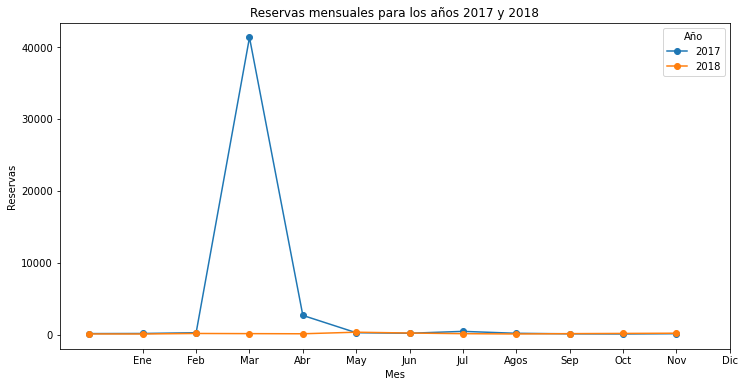

In [179]:
# Creamos la figura y los ejes usa la agrupación por año y mes
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar los datos para cada año
for year in reservations_month['year'].unique():
    data = reservations_month[reservations_month['year'] == year]
    ax.plot(data['month'], data['reservations'], marker='o', label=year)

# Añadir etiquetas y título
ax.set_xlabel('Mes')
ax.set_ylabel('Reservas')
ax.set_title('Reservas mensuales para los años 2017 y 2018')
ax.legend(title='Año')

# Configurar los ticks del eje x para mostrar los meses
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Agos', 'Sep', 'Oct', 'Nov', 'Dic'])

# Mostrar la gráfica
plt.show()

De esta gráfica podemos concluir que el año 2018 tiene un comportamiento bastante lineal en términos de mes, y una considerable menor ccantidad de reservas en comparación con el aaño 2017.
Een el año 2017 se puede que Marzo fue el mes con más reservas.

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

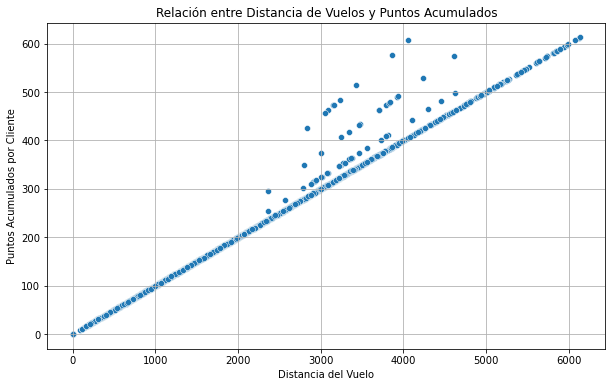

In [180]:
# Creamos un gráfico de dispersión para visualizar la relación entre 'distance' y 'points'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='points_accumulated', data=df_clientes_unicos)
plt.title('Relación entre Distancia de Vuelos y Puntos Acumulados')
plt.xlabel('Distancia del Vuelo')
plt.ylabel('Puntos Acumulados por Cliente')
plt.grid(True)
plt.show()

De esta gráfica podemos observar una relación lineal entre la distancia del vuelo y los puntos de los clientes. A mayor distancia, mayor cantidad de puntos acumulados.

3. ¿Cuál es la distribución de los clientes por provincia o estado?

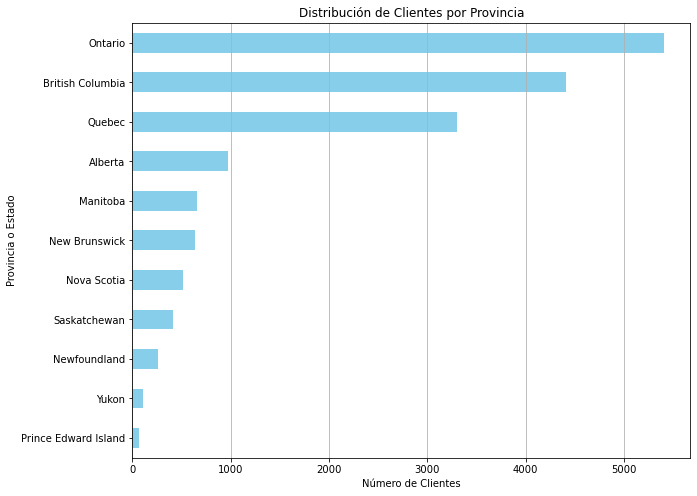

In [182]:
# Contamos el número de clientes por provincia
clientes_provincia = df_clientes_unicos['province'].value_counts().sort_values(ascending=True)

# Creamos un gráfico de barras horizontal
plt.figure(figsize=(10, 8))
clientes_provincia.plot(kind='barh', color='skyblue')
plt.title('Distribución de Clientes por Provincia')
plt.xlabel('Número de Clientes')
plt.ylabel('Provincia o Estado')
plt.grid(axis='x')  # Añadimos cuadrícula solo en el eje x
plt.show()

La provincia con mayor cantidad de clientes es Ontario, y la con menor cantidad de clientes ess Prince Edwardd Island.

5. ¿Cuál es la proporción de clientes con diferentes tipos detarjetas de fidelidad?

Proporción de clientes por tipo de tarjeta de fidelidad:
Star      0.456294
Nova      0.338830
Aurora    0.204875
Name: loyalty_card, dtype: float64


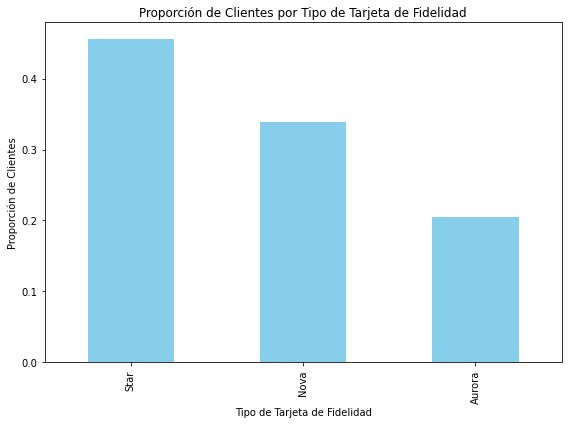

In [183]:
# Contamos el número de clientes por tipo de tarjeta
card_total = df_clientes_unicos['loyalty_card'].value_counts()

# Calculamos la proporción
total_clients = card_total.sum()
proportions = card_total / total_clients

# Mostramos los resultados
print("Proporción de clientes por tipo de tarjeta de fidelidad:")
print(proportions)

# Graficamos los resultados
fig, ax = plt.subplots(figsize=(8, 6))
proportions.plot(kind='bar', ax=ax, color='skyblue')

# Añadir etiquetas y título
ax.set_xlabel('Tipo de Tarjeta de Fidelidad')
ax.set_ylabel('Proporción de Clientes')
ax.set_title('Proporción de Clientes por Tipo de Tarjeta de Fidelidad')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

Concluimos que un 40% de los clientes usa la tarjeta Star, mientras que un pocoo más del 30% usa la tarjeta Nova, y un 20% la tarjeta Aurora

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

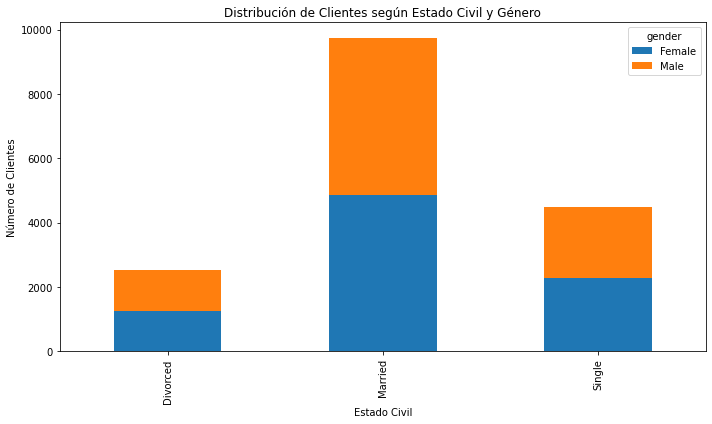

In [184]:

# Contamos el número de clientes por estado civil y género
status_gender_counts = df_clientes_unicos.groupby(['marital_status', 'gender']).size().unstack()

# Graficar los resultados
fig, ax = plt.subplots(figsize=(10, 6))
status_gender_counts.plot(kind='bar', stacked=True, ax=ax)

# Añadir etiquetas y título
ax.set_xlabel('Estado Civil')
ax.set_ylabel('Número de Clientes')
ax.set_title('Distribución de Clientes según Estado Civil y Género')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

De esta gráfica podemos concluir que la mayor cantidad de clientes, independiente de su género, está casado. Dentro del estado civil 'casad', la distribución de género es más o menos equitativa, es decir, un 50% sone hombres casados y un 50% son mujeres casadas.

# Fase 3: Evaluación de Diferencias en Reservas de Vuelos por NivelEducativo

In [190]:
#Filtramos el conjunto de datos dejando únicamente las columnas que usaremos para el análisis
columnas_analisis = ['flights_booked', 'education']
df_analisis = df_clientes_unicos[columnas_analisis].copy()
df_analisis.head()

,flights_booked,education
0,0,Bachelor
24,9,College
48,8,College
72,15,College
96,0,Bachelor


In [191]:
#revisamos si nuestra data sigue limpia
exploracion_dataframe(df_analisis)

Este DataFrame tiene la siguiente forma: (16737, 2)

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 16641

 ..................... 

Los nulos que tenemos en el conjunto de datos son:
No hay columnas con nulos

 ..................... 

Los tipos de las columnas son:


,tipo_dato
flights_booked,int64
education,object



 ..................... 

VALORES DE LAS COLUMNAS CATEGÓRICAS
La columna EDUCATION tiene las siguientes valore únicos:


,education
Bachelor,10475
College,4238
High School or Below,782
Doctor,734
Master,508



 ..................... 

Los principales estadísticos de las columnas categóricas son: 


,count,unique,top,freq
education,16737,5,Bachelor,10475



 ..................... 

Los principales estadísticos de las columnas numéricas son: 


,count,mean,std,min,25%,50%,75%,max
flights_booked,16737.0,2.86019,4.037829,0.0,0.0,0.0,6.0,21.0


Evaluamos Normalidad en los datos

In [192]:
#evaluamos Normalidad
# lo primero que hacemos es crear una función para testar la normalidad de los datos
def normalidad(dataframe, columna):
    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

In [194]:
normalidad(df_analisis ,'flights_booked')

Para la columna flights_booked los datos no siguen una distribución normal.


Evaluamos Homogeneidad

In [195]:
def homogeneidad (dataframe, columna, columna_metrica):    
    # lo primero que tenemos que hacer es crear tantos conjuntos de datos para cada una de las categorías que tenemos, Control Campaign y Test Campaign
    valores_evaluar = []
    
    for valor in dataframe[columna].unique():
        valores_evaluar.append(dataframe[dataframe[columna]== valor][columna_metrica])

    statistic, p_value = stats.levene(*valores_evaluar)
    if p_value > 0.05:
        print(f"Para la métrica {columna_metrica} las varianzas son homogéneas entre grupos.")
    else:
        print(f"Para la métrica {columna_metrica}, las varianzas no son homogéneas entre grupos.")

In [198]:
homogeneidad(df_analisis ,'education', 'flights_booked')

Para la métrica flights_booked las varianzas son homogéneas entre grupos.


Aplicamos test de ANOVA

In [200]:
# Crear una tabla de contingencia
contingency_table = pd.crosstab(df_analisis['education'], df_analisis['flights_booked'])

# Realizar la prueba de proporciones
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Imprimir el resultado de la prueba
alpha = 0.05
if p_value < alpha:
    print("Hay una diferencia significativa en la tasa de rotación entre el Grupo A y el Grupo B.")
    print("\n ---------- \n")
    print("""
          Los resultados sugieren que existe evidencia estadística para afirmar que las medias de las muestras son distintas. 
          Por lo tanto, el nivel de satisfacción de el empleado influye en la desición de abandonar la empresa   
          """)
else:
    print("No hay evidencia de una diferencia significativa en la tasa de rotación entre el Grupo A y el Grupo B.")
    print("\n ---------- \n")
    print(""" 
          Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas,
          por lo que el nivel de satisfacción de el empleado NO influye en la desición de abandonar la empresa  
          """)

No hay evidencia de una diferencia significativa en la tasa de rotación entre el Grupo A y el Grupo B.

 ---------- 

 
          Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas,
          por lo que el nivel de satisfacción de el empleado NO influye en la desición de abandonar la empresa  
          
